In [54]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt

$$
\mathbb{P}(A | B) = \frac{\mathbb{P}(B | A)\mathbb{P}(A)}{\mathbb{P}(B)}
$$


$$
\mathbb{P}(SR_{prior} | SR_{observed}) = \frac{\mathbb{P}(SR_{observed} | SR_{prior})\mathbb{P}(SR_{prior})}{\mathbb{P}(SR_{observed})}
$$

In [76]:
# Empirical
SR_OOS_MU: float = 1.0
SR_OOS_SIGMA: float = 0.25
SR_OOS_DEGREES_OF_FREEDOM: float = 5

# Prior
SR_PRIOR_MU: float = 0.0
SR_PRIOR_SIGMA: float = 0.25

# Simulate
sr_oos: np.ndarray = np.random.standard_t(df=SR_OOS_DEGREES_OF_FREEDOM, size=1_000) * SR_OOS_SIGMA + SR_OOS_MU
sr_prior: np.ndarray = np.random.normal(loc=SR_PRIOR_MU, scale=SR_PRIOR_SIGMA, size=1_000)

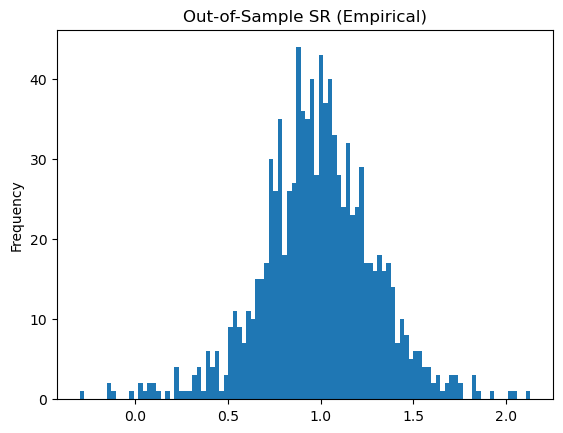

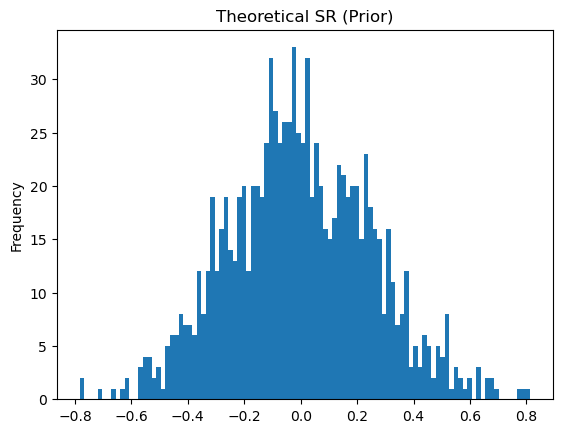

In [77]:
pd.Series(sr_oos).plot(kind="hist", title="Out-of-Sample SR (Empirical)", bins=100)
plt.show()

pd.Series(sr_prior).plot(kind="hist", title="Theoretical SR (Prior)", bins=100)
plt.show()

In [78]:
posterior = {}

for i in tqdm(tuple(range(1_000))):
    
    a = sr_prior[i]
    posterior[a] = {}
    
    for j in range(1_000):

        b = sr_oos[j]

        # TODO: fix to make these pdfs or simulated pdfs, not cdfs
        p_b_given_a = len(np.where(sr_prior >= b)[0]) / len(sr_prior) * len(np.where(sr_prior >= a)[0]) / len(sr_prior)
        p_b = len(np.where(sr_oos >= b)[0]) / len(sr_oos)

        posterior[a][b] = p_b_given_a / p_b

100%|██████████| 1000/1000 [00:10<00:00, 94.42it/s]


<Axes: ylabel='Frequency'>

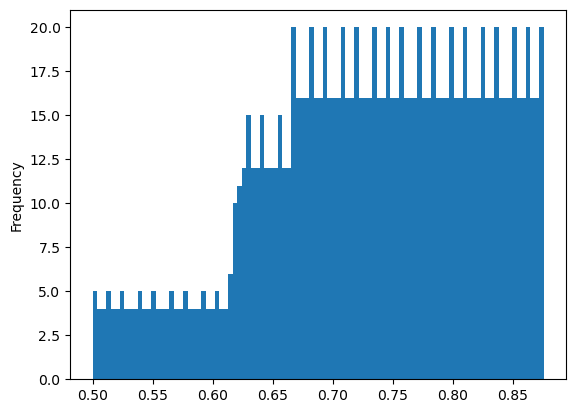

In [85]:
pd.DataFrame(posterior).iloc[np.where(pd.DataFrame(posterior) > 0.5)].iloc[4].plot(kind='hist', bins=100)

In [86]:
pd.DataFrame(posterior).iloc[np.where(pd.DataFrame(posterior) > 0.5)].iloc[4]

-0.180310    0.665760
-0.150958    0.633348
-0.444797    0.845340
-0.084676    0.546624
-0.129077    0.611448
               ...   
-0.199176    0.678024
-0.262591    0.738468
-0.244852    0.720948
-0.274723    0.748980
-0.208158    0.689412
Name: -0.2983959579790283, Length: 1261, dtype: float64